### Medical Cost Personal Insurance EDA & Linear Regression

### Column Content

- `age`: age of primary beneficiary


- `sex`: insurance contractor gender, female, male


- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9


- `children`: Number of children covered by health insurance / Number of dependents


- `smoker`: Smoking


- `region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.


- `charges`: Individual medical costs billed by health insurance


Summary
The main aim of this notebook is to analyse how different variables which include region, age, whether a patient has a child or not, sex, bmi, smoking habit etc, affect their insurance charges.

Each column is picked and analysed how they influence the insurance charge.

We'll be building and training a machine learning model that predicts insurance cost based on certain feature.

For easy understanding we'll be using graphs and plots because visualisation is the best way to understand.

In [94]:
# hiding unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [3]:
#importing dataset into jupyter notebook and getting the first five column
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset has been imported into the jupyter notebook and is displaying the first five column

In [4]:
#getting the shape of the dataframe 
insurance_df.shape

(1338, 7)

The dataset contains 1338 entries with 7 columns.

In [5]:
#getting the information about our dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Displaying the different datatype in our dataset like the object,float, and integers.

In [6]:
#getting the statistical summary for the non numeric column
insurance_df.describe(include= 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Our dataset contains 676 males and 662 females. There are 1064 Non smokers.

In [7]:
#getting the statistical summary for all the dataframe
insurance_df.describe(include= 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


showing the statiscal summary of all our dataframe, to understand the basic information of the data.

In [8]:
#checking for missing values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

we have no missing values in our dataset.

<h3>visualize the overall relationship of data using pairplot and give it a proper title</h3>

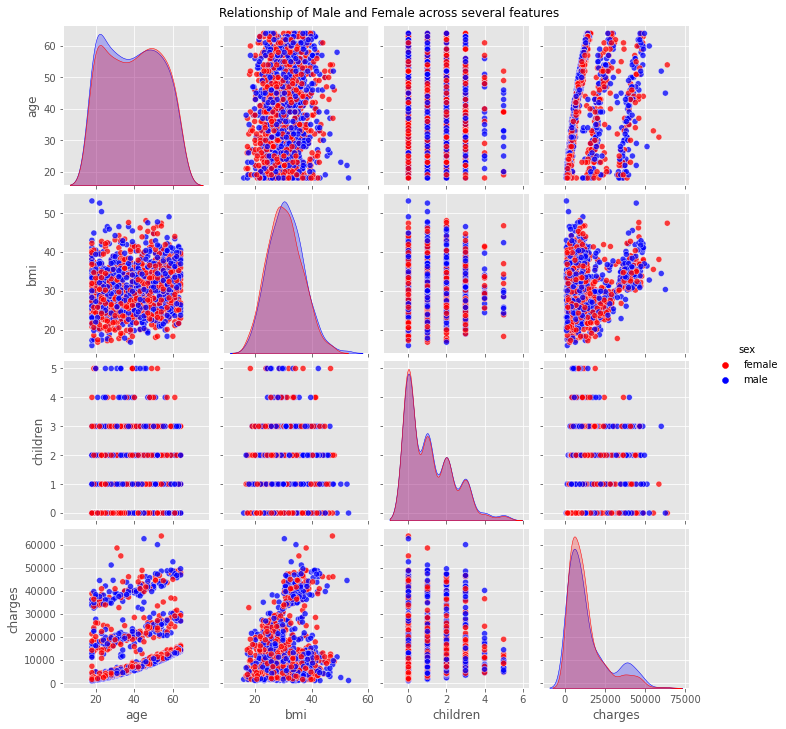

In [9]:
# visualizing the overall relationship of male and female across several features
colours={'male':'blue', 'female':'red'}
sns.pairplot(data=insurance_df,
    plot_kws={'alpha':0.75},
             hue='sex', palette= colours,
            ).fig.suptitle('Relationship of Male and Female across several features', 
                           y=1.01)
plt.show()

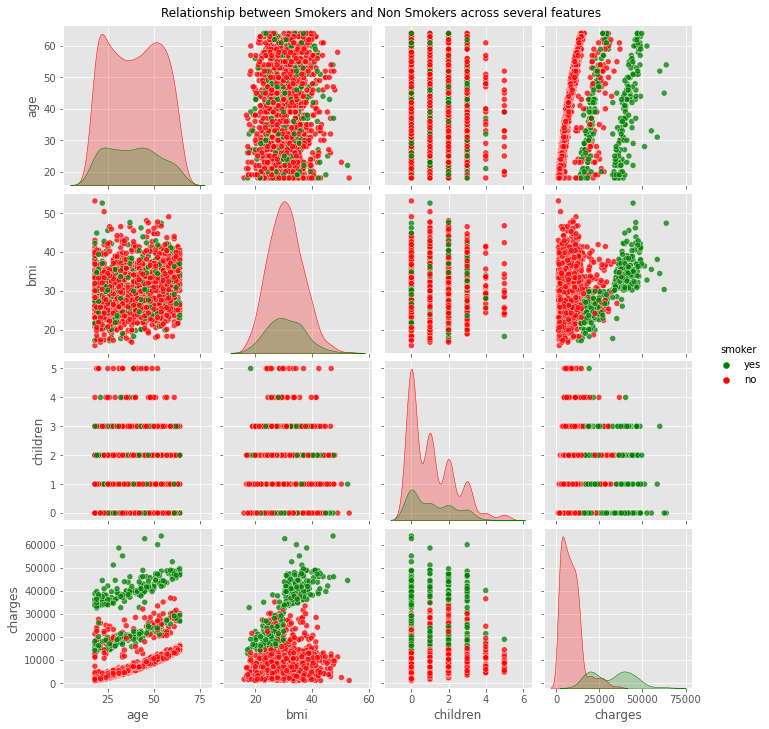

In [10]:
# visualizing the overall relationship between smokers and Non smokers across several features
colours={'yes':'green', 'no':'red'}
sns.pairplot(data=insurance_df,
    plot_kws={'alpha':0.75},
             hue='smoker',palette= colours,
            ).fig.suptitle('Relationship between Smokers and Non Smokers across several features', 
                           y=1.01)
plt.show()


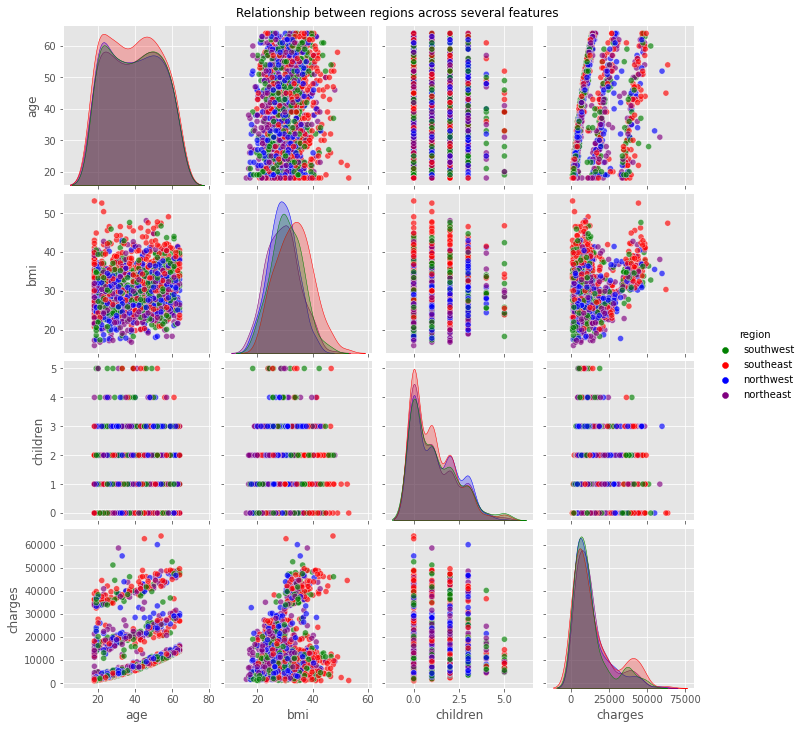

In [11]:
# visualizing the overall relationship between regions across several features
colours={'southwest':'green', 'southeast':'red','northwest':'blue','northeast':'purple'}
sns.pairplot(data=insurance_df,
    plot_kws={'alpha':0.65},
             hue='region',palette= colours,
            ).fig.suptitle('Relationship between regions across several features', 
                           y=1.01)
plt.show()

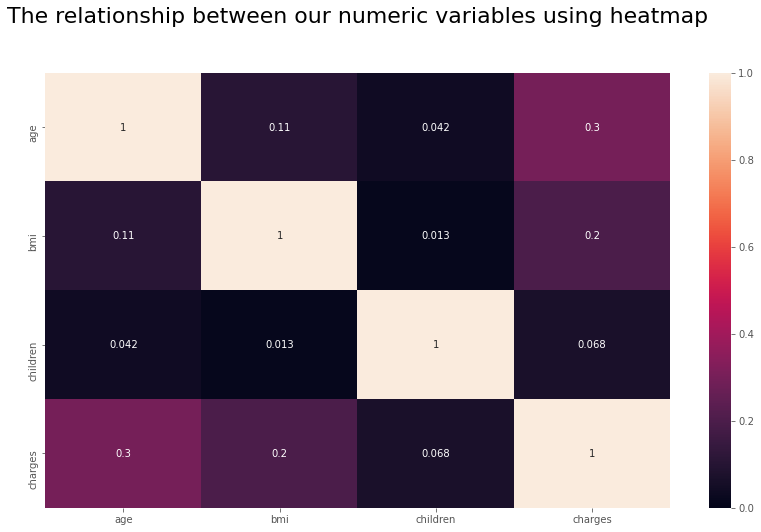

In [12]:
#visualizing the relationship between our numeric values in the dataset
plt.figure(figsize=(14,8))
sns.heatmap(insurance_df.corr(),
vmin=0, vmax=1, annot=True).set_title('The relationship between our numeric variables using heatmap', 
                                      fontdict={'fontsize':22}, pad=50);
plt.show()

 <h3>Gender based relationshp between the charges and bmi</h3>

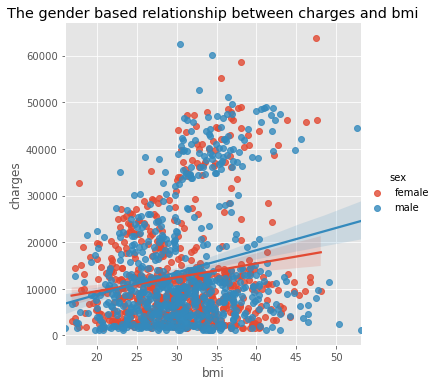

In [13]:
#visualizing the gender based relationship between the charges and bmi 

sns.lmplot(x='bmi', y='charges', hue='sex', data=insurance_df)               
plt.title('The gender based relationship between charges and bmi')
plt.show()

 <h3>Relationship between the charges and bmi among smoker patient using scatterplot.<h3/>

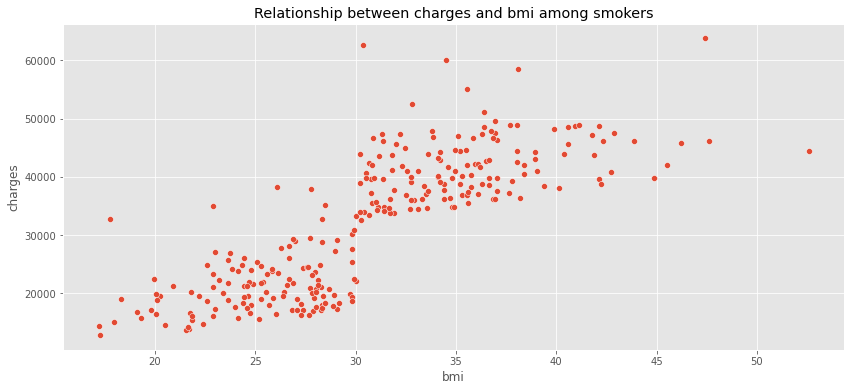

In [14]:
# Showing relationshp between charges and bmi among smokers
plt.figure(figsize=(14,6))
plt.title('Relationship between charges and bmi among smokers')
sns.scatterplot(x='bmi', y='charges', data=insurance_df.loc[insurance_df['smoker']=='yes']);


 <h3>using a plot, show the value counts of smokers and non smokers across gender</h3>

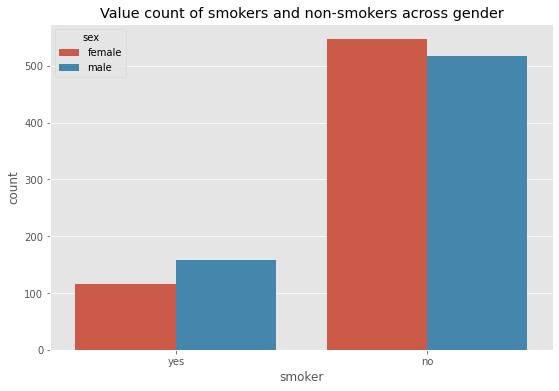

In [15]:
#visualizing the value counts of smokers and non smokers across gender
plt.figure(figsize=(9,6))
plt.title('Value count of smokers and non-smokers across gender')
sns.countplot(x="smoker", data = insurance_df, hue='sex');
#insurance_df[['smoker','sex']].value_counts().plot();
            
            

<h3>with a violin plot, show the charges comparison across gender based on smoking habit</h3>

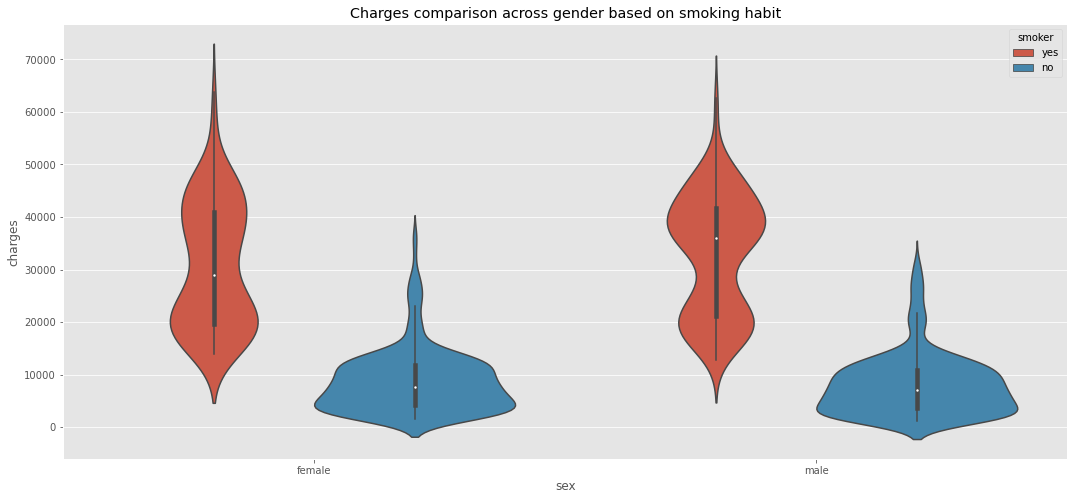

In [16]:
#displaying the charges comparison across gender based on smoking habit
plt.figure(figsize=(18,8))

plt.title('Charges comparison across gender based on smoking habit')
sns.violinplot(x='sex',y='charges', hue='smoker', data=insurance_df);



<h3>plot the total children by patients using a seaborn countplot</h3>

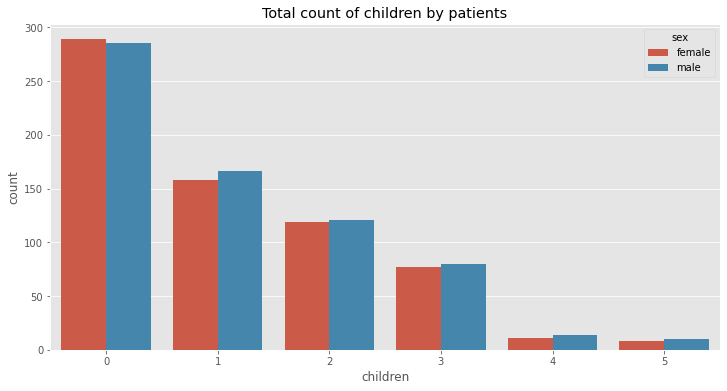

In [17]:
#displaying the total children by patients
plt.figure(figsize=(12,6))
plt.title('Total count of children by patients')
sns.countplot(x="children", data = insurance_df, hue='sex');

<h3>Show the distribution of BMI across several region using a boxplot</h3>

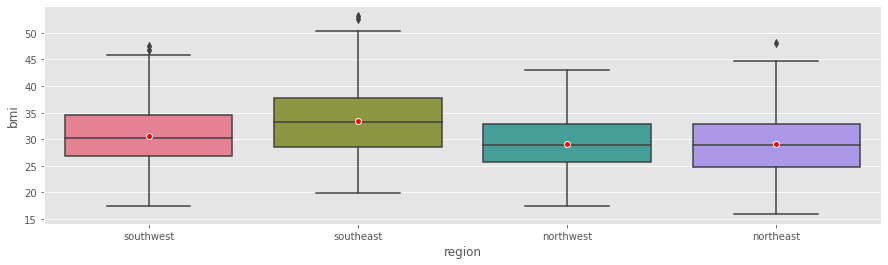

In [18]:
#showing the distribution of bmi across different region
plt.figure(figsize=(15,4))
sns.boxplot(x='region',y='bmi', data=insurance_df, palette='husl', showmeans=True,meanprops={"marker":"o"
                                                                                            ,"markerfacecolor":"red"
                                                                                            ,"markersize":"6"
                                                                                            ,"markeredgecolor":"white"});

<h3>Show the distribution of BMI and sex with a violin plot</h3>

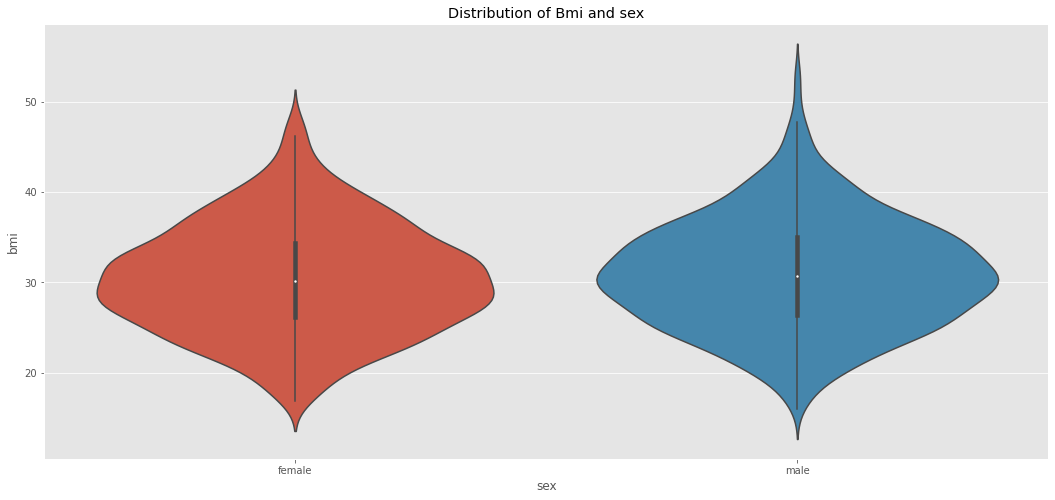

In [19]:
#showing the distribution of bmi and sex
plt.figure(figsize=(18,8))

plt.title('Distribution of Bmi and sex')
sns.violinplot(x='sex',y='bmi', data=insurance_df);



<h3>show relationship between insurance cost & smokers using a swarmplot (x-axis = children)</h3>

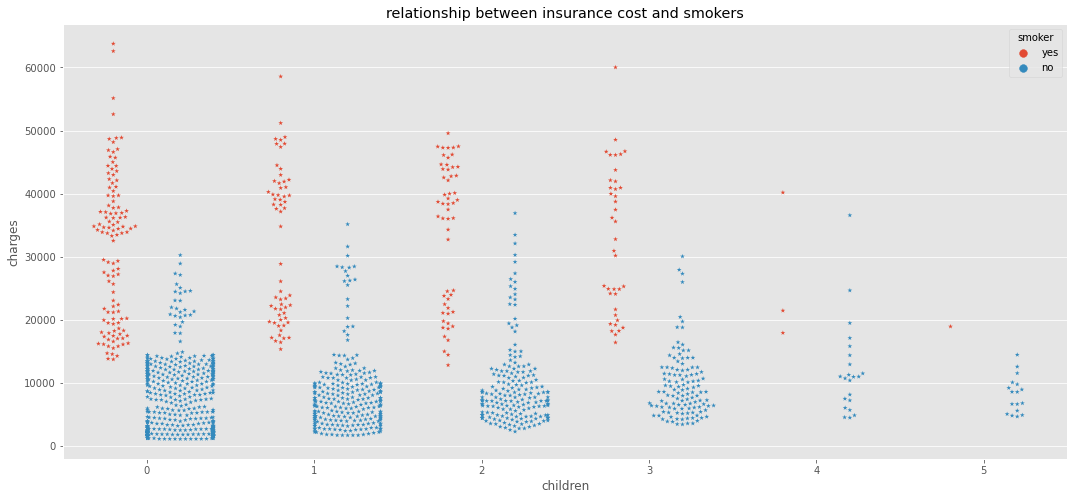

In [20]:
#showing the relationship between isurance cost and smokers
plt.figure(figsize=(18,8))
plt.title('relationship between insurance cost and smokers')
sns.swarmplot(data=insurance_df, y='charges',x='children',hue='smoker',split=True,marker="*",size=5);

<h3>plot the insurance charges of smokers vs non smokers across regions using a swarmplot</h3>

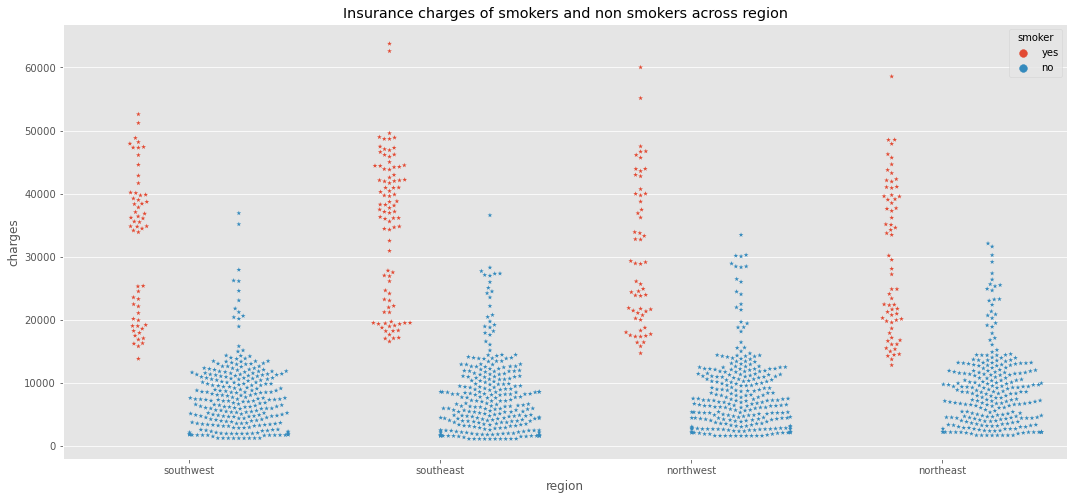

In [21]:
#showing the insurance charges of smokers vs non smokers across variour regions
plt.figure(figsize=(18,8))
plt.title('Insurance charges of smokers and non smokers across region')
sns.swarmplot(data=insurance_df,y='charges', x='region',hue='smoker',split=True, marker="*",size=5);

From the graph,we can see that the region has no effect on the insurance charges 

<h3>How many patients are less than 18 years and equal to 18.</h3>

In [22]:
 # Getting the total number of patients that are less than 18 or equal to 18 years
insurance_df.loc[insurance_df['age'] <= 18]["age"].agg("count")

69

There are 69 Patient that are less than or equal to 18 years

<h3>Clearly state the existing number of male and female in your result.</h3>

In [23]:
#Using the groupby and Agg function to get the total number of females and males 
insurance_df.groupby("sex")["sex"].agg("count")

sex
female    662
male      676
Name: sex, dtype: int64

There are 662 Females and 676 Males in our dataset

<h3>Using a pie chart, show the percentage of male to female and also the percentage ratio of smokers to non smokers</h3>

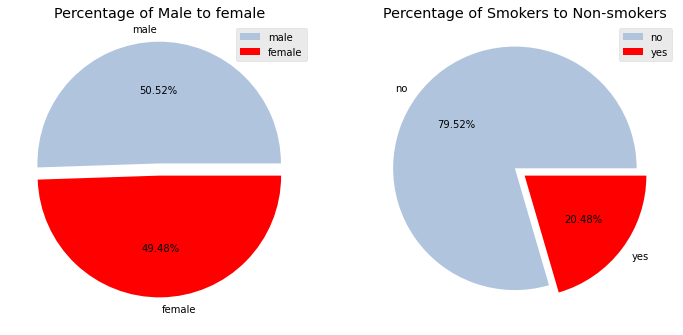

In [24]:
#checking the percentage ratio of male to female and also the percentage ratio of smokers to non smokers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Percentage of Male to female")
colours = ["lightsteelblue", "red"]
myexplode = [0.1,0.0]
plt.pie(insurance_df["sex"].value_counts(),
        autopct = "%.2f%%", colors = colours,explode= myexplode, labels = insurance_df["sex"].value_counts().index);
plt.legend()


plt.subplot(1, 2, 2)
plt.title("Percentage of Smokers to Non-smokers")
colours = ["lightsteelblue", "red"]
myexplode = [0.1,0.0]
plt.pie(insurance_df["smoker"].value_counts(),
        autopct = "%.2f%%", colors = colours,explode= myexplode, labels = insurance_df["smoker"].value_counts().index);
plt.legend();





From our pie chart, the percentage difference between the male and females is small(50:49) compared to the percentage ratio difference between the smokers to non-smokers(79.5:20)

<h3> How many 18 year old patient have children</h3>

In [25]:
#checking for how many 18 year old patient has children
insurance_df.loc[(insurance_df['age'] == 18
               ) & 
               (insurance_df['children'] != 0)]["children"].agg("count")



18

The number of 18 year old patients with children are 18

<h3>What is the total number of children by the 18 year old patients</h3>

In [26]:
#Getting the total number of children by the 18 year old patients
insurance_df.loc[insurance_df['age'] == 18]["children"].sum()

31

The total number of children by the 18 year old patients are 31

In [27]:
#making a new copy of our insurance dataframe
new_df = insurance_df.copy()

In [28]:
#
new_df["with children"] = new_df["children"]
new_df["with children"]=new_df["with children"].replace([1, 2,3,4,5], "yes")
new_df["with children"]=new_df["with children"].replace([0], "no")
new_df.head()

,age,sex,bmi,children,smoker,region,charges,with children
0,19,female,27.900,0,yes,southwest,16884.92400,no
1,18,male,33.770,1,no,southeast,1725.55230,yes
2,28,male,33.000,3,no,southeast,4449.46200,yes
3,33,male,22.705,0,no,northwest,21984.47061,no
4,32,male,28.880,0,no,northwest,3866.85520,no


<h3>Using a graph, compare the insurance charges between patients with children and patients without children</h3>

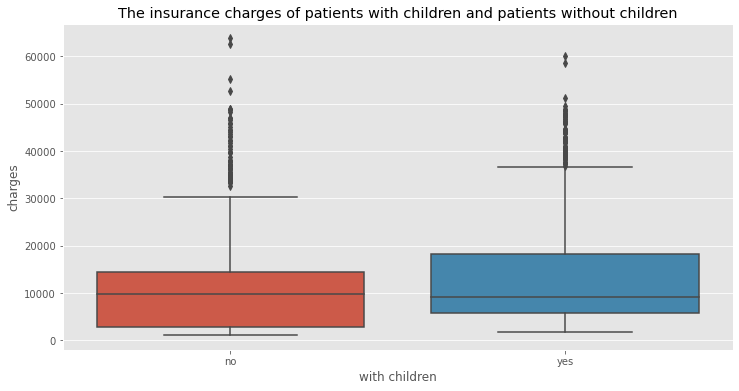

In [29]:
#viewing and comparing the insurance charges between patients with children and patients without children
plt.figure(figsize=(12, 6))
plt.title('The insurance charges of patients with children and patients without children')
sns.boxplot(x='with children', y='charges', data=new_df);



The graph shows that patients with children has a slightly high insurance charges, compared to patients without children that has a low insurance charge.

<h3>charges between smoker and non smoker patients with children</h3>

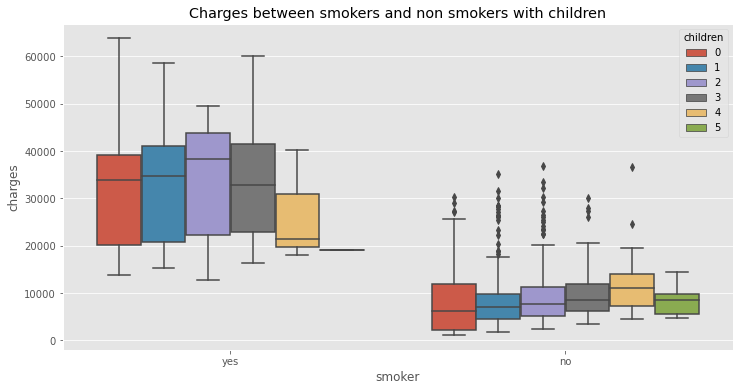

In [30]:
#viweing the charges between our smoker and non smoker patients with children
plt.figure(figsize=(12, 6))
plt.title('Charges between smokers and non smokers with children')
sns.boxplot(x=new_df['smoker'], y='charges', hue='children',data=new_df);



From the graph, we notice that the insurance charge of smokers with children is high, more than non smokers with children.The higher number  of children a patient has the lesser insurance charge they pay.

<h3>Using a graph, compare the insurance charges between smoker patients with children and non smoker patients without children. Document your findings on how it affect the insurance charge</h3>

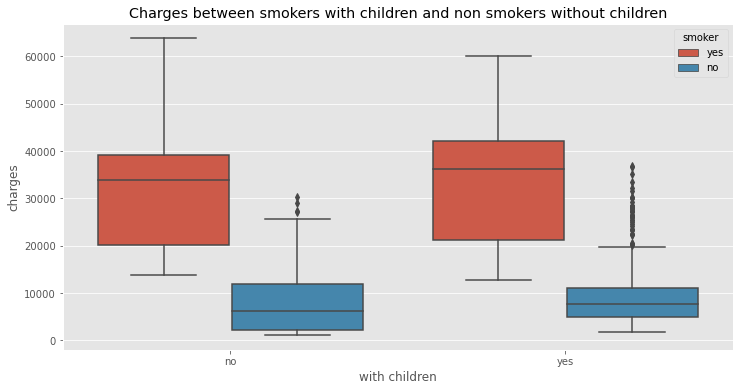

In [31]:
plt.figure(figsize=(12, 6))
plt.title('Charges between smokers with children and non smokers without children')
sns.boxplot(x=new_df['with children'], y='charges', hue='smoker',data=new_df);

From the above graph, it is observed that smokers with children has a higher insurance charges, but the non smokers without children has a low insurance charges. 

<h3>How many patients are above 18?</h3>

In [32]:
insurance_df.loc[insurance_df['age'] > 18]["age"].agg("count")

1269

we have 1269 patients who are above the age of 18.

<h3>Clearly state the existing number of male and female in your result</h3>

In [33]:
#Using the groupby and Agg function to get the number of male and female
insurance_df.groupby("sex")["sex"].agg("count")

sex
female    662
male      676
Name: sex, dtype: int64

we have 662 number of females and 676 number of males

<h3>Using a pie chart, show the percentage of male to female and also the percentage ratio of smokers to non smokers</h3>

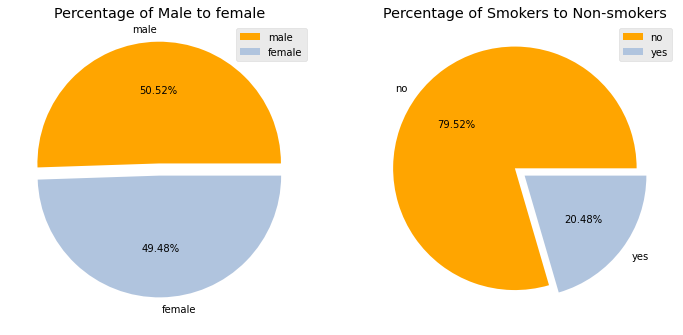

In [34]:
#checking the percentage ratio of male to female and also the percentage ratio of smokers to non smokers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Percentage of Male to female")
colours = ["orange", "lightsteelblue"]
myexplode = [0.1,0.0]
plt.pie(insurance_df["sex"].value_counts(),
        autopct = "%.2f%%", colors = colours,explode= myexplode, labels = insurance_df["sex"].value_counts().index);
plt.legend()


plt.subplot(1, 2, 2)
plt.title("Percentage of Smokers to Non-smokers")
colours = ["orange", "lightsteelblue"]
myexplode = [0.1,0.0]
plt.pie(insurance_df["smoker"].value_counts(),
        autopct = "%.2f%%", colors = colours,explode= myexplode, labels = insurance_df["smoker"].value_counts().index);
plt.legend();



from the above chart, it is clearly seen that the percentage ratio of male to female is (50:49). And the percentage ratio of smokers to non smokers is (79:20). so is it known that the male has a slighty high percentage ratio than the female, also the smokers has a high percentage ratio than non smokers

In [35]:
new_df.loc[(new_df["age"]>18) & (new_df["with children"]=="yes")].agg("count")

age              746
sex              746
bmi              746
children         746
smoker           746
region           746
charges          746
with children    746
dtype: int64

In [36]:
new_df.loc[(new_df["age"]>18) & (new_df["with children"]=="no")].agg("count")

age              523
sex              523
bmi              523
children         523
smoker           523
region           523
charges          523
with children    523
dtype: int64

<h3>What is the total number of children by patient above 18</h3>

In [37]:
#Getting the total number of children by patient above 18
insurance_df.loc[insurance_df['age'] > 18]["children"].sum()


1434

The total number of children by patients that are above 18 is 1434

<h3>Using a graph, compare the insurance charges between patients with children and patients without children. Document your findings on how it affect the insurance charge</h3>

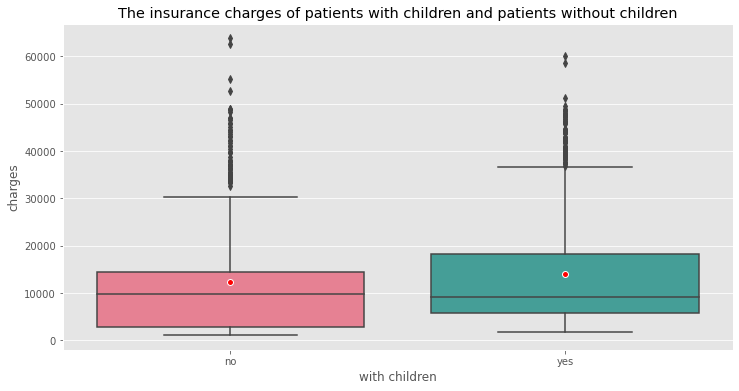

In [38]:
# viewing and comparing the insurance charges between patients with children and patients without children
plt.figure(figsize=(12, 6))
plt.title('The insurance charges of patients with children and patients without children')
sns.boxplot(x='with children', y='charges', data=new_df,palette='husl', showmeans=True,meanprops={"marker":"o"
                                                                                            ,"markerfacecolor":"red"
                                                                                            ,"markersize":"6"
                                                                                            ,"markeredgecolor":"white"});

we observe that the insurance charges of patients with children is high which means they pay more insurance charge, compared to patients without children that pays less.

<h3>Using a graph, compare the insurance charges between smoker and non smoker patients with children. Document your findings on how it affect the insurance charge</h3>

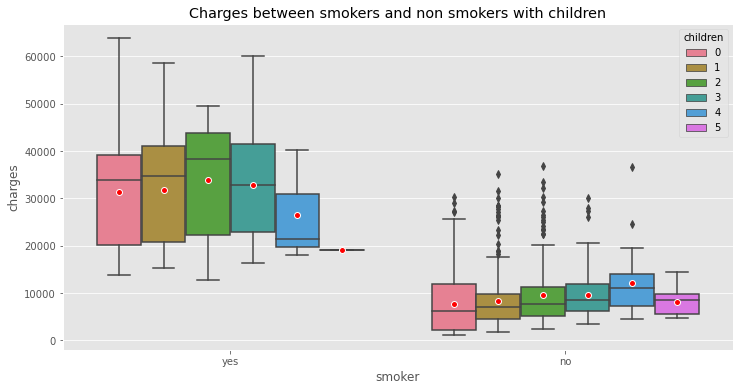

In [39]:
#viweing the charges between our smoker and non smoker patients with children
plt.figure(figsize=(12, 6))
plt.title('Charges between smokers and non smokers with children')
sns.boxplot(x=new_df['smoker'], y='charges', hue='children',data=new_df,palette='husl', showmeans=True,meanprops={"marker":"o"
                                                                                            ,"markerfacecolor":"red"
                                                                                            ,"markersize":"6"
                                                                                            ,"markeredgecolor":"white"});

The smoker patients with children has a high insurance charge, which means they tend to pay more insurance charges. but the non smokers with children still pays less insurance charges, but if the smoker has more children their insurance charge is slightly low but still not lesser than the non smokers. generally it means the insurer charges more for patients that smokes. 

<h3>Using a graph, compare the insurance charges between smoker patients with children and non smoker patients without children. Document your findings on how it affect the insurance charge</h3>

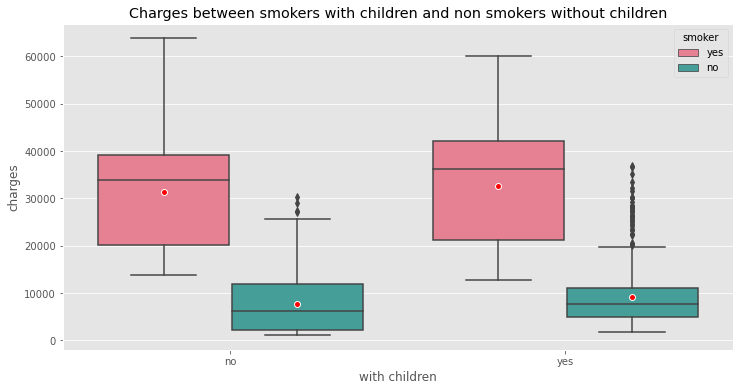

In [40]:
plt.figure(figsize=(12, 6))
plt.title('Charges between smokers with children and non smokers without children')
sns.boxplot(x=new_df['with children'], y='charges', hue='smoker',data=new_df, palette='husl', showmeans=True,meanprops={"marker":"o"
                                                                                            ,"markerfacecolor":"red"
                                                                                            ,"markersize":"6"
                                                                                            ,"markeredgecolor":"white"});

we observe from the above graph that the smoker patients with children has slightly high insurance charges, compared to the non smoker patients without children.

## PART C

### Complete the machine learning process and properly document each of the steps you took

In [41]:
# importing the required machine learning libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


In [42]:
# creating a copy of dataset
df = insurance_df.copy()

In [43]:
#getting the first five column
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


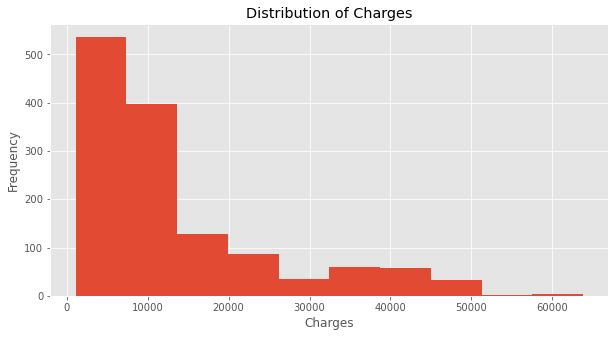

In [92]:
#plot histogram of target/dependent variable(charges) to see distribution
plt.figure(figsize = (10,5))
df['charges'].plot(kind = "hist")
plt.xlabel("Charges")
plt.title("Distribution of Charges");

In [93]:
# dropping the sex, region and smoker column, converting the categorical variables to 0s and 1s so the machine can understand
sex = pd.get_dummies(df['sex'],drop_first=True)
smoker = pd.get_dummies(df['smoker'],drop_first=True)
region = pd.get_dummies(df['region'],drop_first=True)

In [46]:
#adding additional features  to the original data
df['is_smoker'] = smoker
df['is_male'] = sex
df.head()

,age,sex,bmi,children,smoker,region,charges,is_smoker,is_male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [47]:
#dropping the sex, smoker and region column
df_new = df.drop(['sex','region','smoker'], axis=1)
df_new.head()

,age,bmi,children,charges,is_smoker,is_male
0,19,27.900,0,16884.92400,1,0
1,18,33.770,1,1725.55230,0,1
2,28,33.000,3,4449.46200,0,1
3,33,22.705,0,21984.47061,0,1
4,32,28.880,0,3866.85520,0,1


In [48]:
#defining the feature and target column
X = df_new.drop(['charges'], axis=1)
y = df_new['charges']

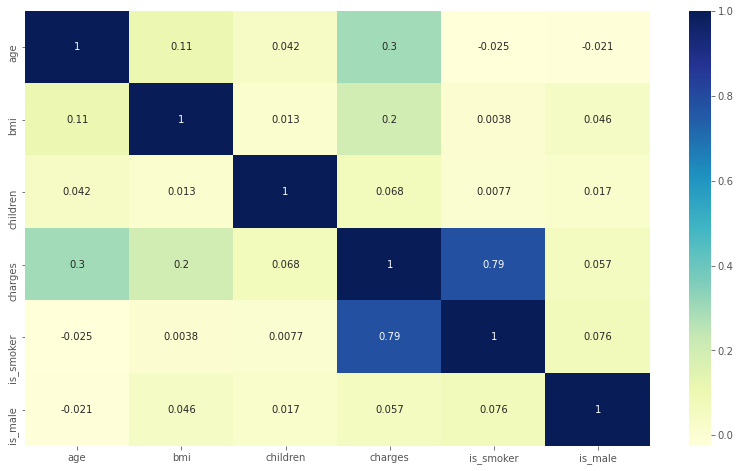

In [49]:
#using pearson correlation (corr() function), to plot all correlations(positive (0.5 - 0.1)) and negative(-0.5 - -1.0))
plt.figure(figsize=(14,8))
cor = df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlGnBu)
plt.show()

In [50]:
#displaying the different correlation of dependent and non dependent variable
df.corr()

,age,bmi,children,charges,is_smoker,is_male
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292
is_smoker,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185
is_male,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000


In [51]:
#identifying positive correlations with target variable
target_corr = abs(cor["charges"]) #charges is target variable
positive_corr_target = target_corr[target_corr > (0.5)]
positive_corr_target

charges      1.000000
is_smoker    0.787251
Name: charges, dtype: float64

there is a positive correlation between the charges and is_smoker

<h3>splitting the data</h3>

In [52]:
# spliting the test and train data into a 75% train size and 25% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
#printing the shape of our (X_train, X_test, y_train, y_test)
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("Y Train :", y_train.shape)
print("Y Test :", y_test.shape)

X Train :  (1003, 5)
X Test :  (335, 5)
Y Train : (1003,)
Y Test : (335,)


<h3>A) Training the models</h3>

In this section we will train 4 different models;
    1. Linear regression(model_linear)
    2. Ridge regression(model_ridge)
    3. Lasso regression(model_lasso)
    4. Random forest regressor(model_RFR)

<h3> Training a Regression model</h3>

In [54]:
#importing the linear_model
from sklearn import linear_model
model = linear_model.LinearRegression()

#fitting the linear model into X_train, y_train
model = model.fit(X_train, y_train)


In [55]:
#checking the score of X_test, y_test
model.score(X_test, y_test)

0.7652077247609825

In [56]:
#checking the score of X_train, y_train 
model.score(X_train, y_train)

0.7441660615416086

In [57]:
#displaying the X_train
X_train

,age,bmi,children,is_smoker,is_male
693,24,23.655,0,0,1
1297,28,26.510,2,0,0
634,51,39.700,1,0,1
1022,47,36.080,1,1,1
178,46,28.900,2,0,0
...,...,...,...,...,...
1095,18,31.350,4,0,0
1130,39,23.870,5,0,0
1294,58,25.175,0,0,1
860,37,47.600,2,1,0


In [58]:
#getting the y_train
y_train

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1003, dtype: float64

In [59]:
#making predictions and assigning to a new varaible
X_preds = model.predict(X_train)

In [60]:
#getting the X_preds array
X_preds[0:10]

array([ 1754.57996913,  4533.44578628, 14466.05069057, 35868.37853991,
        9996.9583838 , 12670.09740354,  4985.01012854,  4904.37589928,
        4349.20487191,  2244.33304123])

In [61]:
#calculation of the MSE, MAE and SCore to check the performance of the model

from sklearn.metrics import r2_score

train_rmse = mean_squared_error(y_train, X_preds, squared=False)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

print("R2 score", r2_score(y_train,X_preds))

train_rmae = mean_absolute_error(y_train, X_preds)
print('The RMAE loss for the training set is {}.'.format(train_rmse))





The RMSE loss for the training set is 6092.540265209529.
R2 score 0.7441660615416086
The RMAE loss for the training set is 6092.540265209529.


In [62]:
#getting our X_test
X_test

,age,bmi,children,is_smoker,is_male
764,45,25.175,2,0,0
887,36,30.020,0,0,0
890,64,26.885,0,1,0
1293,46,25.745,3,0,1
259,19,31.920,0,1,1
...,...,...,...,...,...
342,60,27.550,0,0,0
308,58,34.865,0,0,1
1128,34,32.800,1,0,1
503,19,30.250,0,1,1


In [63]:
#getting our y_test
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
342     13217.09450
308     11944.59435
1128    14358.36437
503     32548.34050
1197     5699.83750
Name: charges, Length: 335, dtype: float64

In [64]:
y_preds = model.predict(X_test)
pd.Series(y_preds)

0       8516.761620
1       6893.859056
2      36776.198772
3       9464.380662
4      26789.922546
           ...     
330    12325.644825
331    14267.744340
332     7785.278314
333    26242.897358
334     9416.394525
Length: 335, dtype: float64

In [65]:
#calculating the MSE, MAE and score to see our model performance
train_rmse = mean_squared_error(y_test, y_preds, squared=False)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

print("R2 score", r2_score(y_test,y_preds))

train_rmae = mean_absolute_error(y_test, y_preds)
print('The RMAE loss for the training set is {}.'.format(train_rmse))


The RMSE loss for the training set is 5952.148688048978.
R2 score 0.7652077247609825
The RMAE loss for the training set is 5952.148688048978.


In [66]:
#getting the weights assigned to different columns, to check which column is more important in the dataset
weights = model.coef_
weights

array([  260.03578967,   327.55999306,   434.80431165, 23628.2381829 ,
          66.06974502])

In [67]:
#creating a dataframe to check the weights assigned to different column
weights_df = pd.DataFrame({
    'columns': X_train.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [68]:
#viewing the first five column of our dataframe
weights_df.head()

,columns,weight
3,is_smoker,23628.238183
2,children,434.804312
1,bmi,327.559993
0,age,260.035790
4,is_male,66.069745


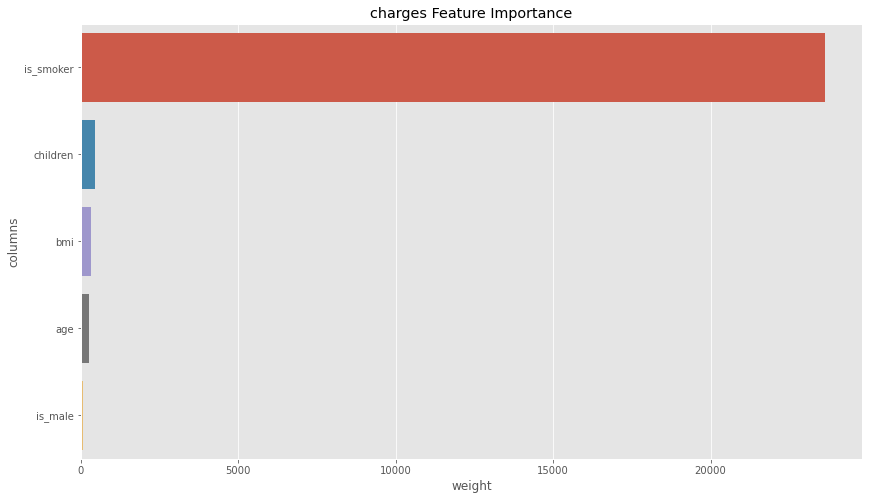

In [69]:
#using a plot to visualize the charges feature importance, it's effect on different columns
plt.figure(figsize=(14,8))
plt.title('charges Feature Importance')
sns.barplot(y=weights_df.head()['columns'], x=weights_df.head()['weight']);

<h3>Ridge regression</h3>

In [70]:
R=Ridge(alpha=0.0001)

In [71]:
#fitting the Ridge model into the X_train and y_train
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [72]:
#making the predictions and saving it to a new variable
y_preds=R.predict(X_test)

In [73]:
#evaluating the performance of our model using MSE,MAE and Score
train_rmse = mean_squared_error(y_test, y_preds, squared=False)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

print("R2 score", r2_score(y_test,y_preds))

train_rmae = mean_absolute_error(y_test, y_preds)
print('The RMAE loss for the training set is {}.'.format(train_rmse))

The RMSE loss for the training set is 5952.1489824946775.
R2 score 0.7652077015311941
The RMAE loss for the training set is 5952.1489824946775.


<h3> Lasso Regression model</h3>

In [74]:
lasso = Lasso(alpha=1.0, max_iter=100, tol=0.1)

In [75]:
#fitting the lasso model into our X_train and y_train
lasso.fit(X_train, y_train)

Lasso(max_iter=100, tol=0.1)

In [76]:
#making the predictions and saving it to a new variable
y_preds = lasso.predict(X_test)

In [77]:
pd.Series(y_preds)

0       8519.231299
1       6897.705774
2      36773.325382
3       9462.491839
4      26784.716295
           ...     
330    12328.742588
331    14267.040837
332     7784.824275
333    26237.722617
334     9416.279358
Length: 335, dtype: float64

In [78]:
#evaluating the performance of our model
train_rmse = mean_squared_error(y_test, y_preds, squared=False)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

print("R2 score", r2_score(y_test,y_preds))

train_rmae = mean_absolute_error(y_test, y_preds)
print('The RMAE loss for the training set is {}.'.format(train_rmse))


The RMSE loss for the training set is 5952.157807958828.
R2 score 0.7652070052608032
The RMAE loss for the training set is 5952.157807958828.


<h3>RandomForestRegressor()</h3>

In [79]:
RFR = RandomForestRegressor(ccp_alpha=1.0)

In [80]:
#fitting the RFR model into our X_train and y_train
RFR.fit(X_train,y_train)

RandomForestRegressor(ccp_alpha=1.0)

In [81]:
#making our predictions and assigning it to a new variable
y_preds = RFR.predict(X_test)

In [82]:
pd.Series(y_preds)

0      11158.258715
1       5369.121645
2      28148.993720
3       9813.893300
4      34270.184856
           ...     
330    12807.027844
331    11615.471343
332     5549.787252
333    33563.393118
334     7185.180790
Length: 335, dtype: float64

In [83]:
#evaluating the performance of our model
train_rmse = mean_squared_error(y_test, y_preds, squared=False)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

print("R2 score", r2_score(y_test,y_preds))

train_rmae = mean_absolute_error(y_test, y_preds)
print('The RMAE loss for the training set is {}.'.format(train_rmse))

The RMSE loss for the training set is 4917.745507922475.
R2 score 0.8397240492182452
The RMAE loss for the training set is 4917.745507922475.


### Use the basic step to deploy any regression model of choice without a helper function below 👇🏻👇🏻👇🏻

### Using the following already imported regression metric to check your model peformance
- mean_absolute_error
- mean_squared_error
- score

In [84]:
# optional helper function setup

In [85]:
# adding all regression algorithm to test in a list
model_list = [LinearRegression(), Ridge(), RandomForestRegressor(), Lasso()]

In [86]:
# building a helper function to multi test several regression model
def check_model(model, X_train, y_train, X_test, y_test):
    print(model)
    model = model
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    error = mean_absolute_error(y_test,y_preds)
    train_rmse = mean_squared_error(y_test, y_preds, squared=False)
    score = model.score(X,y)
    print(f"The model's mean absolute error: {error}")
    print(f'The model scored: {round(score, 2)}')
    print('The RMSE loss for the training set is {}.'.format(train_rmse))
    print('\n')


In [87]:
# computing and comparing more than one regression algorithm
for model in model_list:
    print('******************************Checking machine learning alogrithm **********************************')
    check_model(model, X_train, y_train, X_test, y_test)
    

******************************Checking machine learning alogrithm **********************************
LinearRegression()
The model's mean absolute error: 4268.696637974908
The model scored: 0.75
The RMSE loss for the training set is 5952.148688048978.


******************************Checking machine learning alogrithm **********************************
Ridge()
The model's mean absolute error: 4282.044924370957
The model scored: 0.75
The RMSE loss for the training set is 5955.354078804621.


******************************Checking machine learning alogrithm **********************************
RandomForestRegressor()
The model's mean absolute error: 2613.018214226227
The model scored: 0.94
The RMSE loss for the training set is 4899.449771541925.


******************************Checking machine learning alogrithm **********************************
Lasso()
The model's mean absolute error: 4269.071172431356
The model scored: 0.75
The RMSE loss for the training set is 5952.165309228473.




In [88]:
## 